In [1]:
# Cell 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
## Step 1: Data Loading & Exploration

#We use the Our World in Data COVID-19 dataset, which includes information on cases, deaths, testing, and vaccinations across countries and over time.

# Source: Local Covid-19 data file
# Format: CSV
# Dimensions: Rows = days per country; Columns = metrics (cases, deaths, tests, vaccinations, etc.)

# Let’s start by loading and previewing the dataset.


In [11]:
### Dataset Overview

# Here we examine the structure of the dataset:

# We list all column names.
# We check for missing values to plan our cleaning process.

#Some important columns we will focus on:
# `date`
# `location`
# `total_cases`
# `total_deaths`
# `new_cases`
# `new_deaths`
# `total_vaccinations`


In [10]:
# Check column names
print(df.columns.tolist())

# Summary of missing values
df.isnull().sum().sort_values(ascending=False)


['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_

weekly_icu_admissions_per_million          418442
weekly_icu_admissions                      418442
excess_mortality_cumulative_per_million    416024
excess_mortality                           416024
excess_mortality_cumulative                416024
                                            ...  
total_deaths                                17631
population                                      0
date                                            0
location                                        0
iso_code                                        0
Length: 67, dtype: int64

In [19]:
## Step 3: Data Cleaning

#We perform several key cleaning steps:

# Convert the `date` column to datetime format for proper time series analysis.
# Filter for selected countries: Kenya, India, and United State.
# Remove rows with missing critical metrics like total cases or deaths.
# Replace missing values in vaccination columns with `0` (assuming no data means no vaccinations).

#his prepares the dataset for meaningful analysis and visualization.


In [12]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Select countries of interest
countries = ['Kenya', 'India', 'United States']
df_filtered = df[df['location'].isin(countries)]

# Drop rows where critical values like total_cases or total_deaths are missing
df_filtered = df_filtered.dropna(subset=['total_cases', 'total_deaths'])

# Fill missing values in vaccination column with 0
df_filtered['total_vaccinations'] = df_filtered['total_vaccinations'].fillna(0)

# Preview cleaned dataset
df_filtered.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
173549,IND,Asia,India,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173550,IND,Asia,India,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173551,IND,Asia,India,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173552,IND,Asia,India,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173553,IND,Asia,India,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN


In [20]:
## Step 4: Exploratory Data Analysis (EDA)

#We explored the COVID-19 situation across Kenya, India, and the United States through several metrics:

# **Total Cases** and **Total Deaths** over time show the trajectory of the pandemic.
# **Daily New Cases** help identify waves and spikes.
# **Death Rate** (Total Deaths / Total Cases) gives a sense of severity and healthcare impact.
#These visualizations highlight differences in pandemic trends across countries and over time.


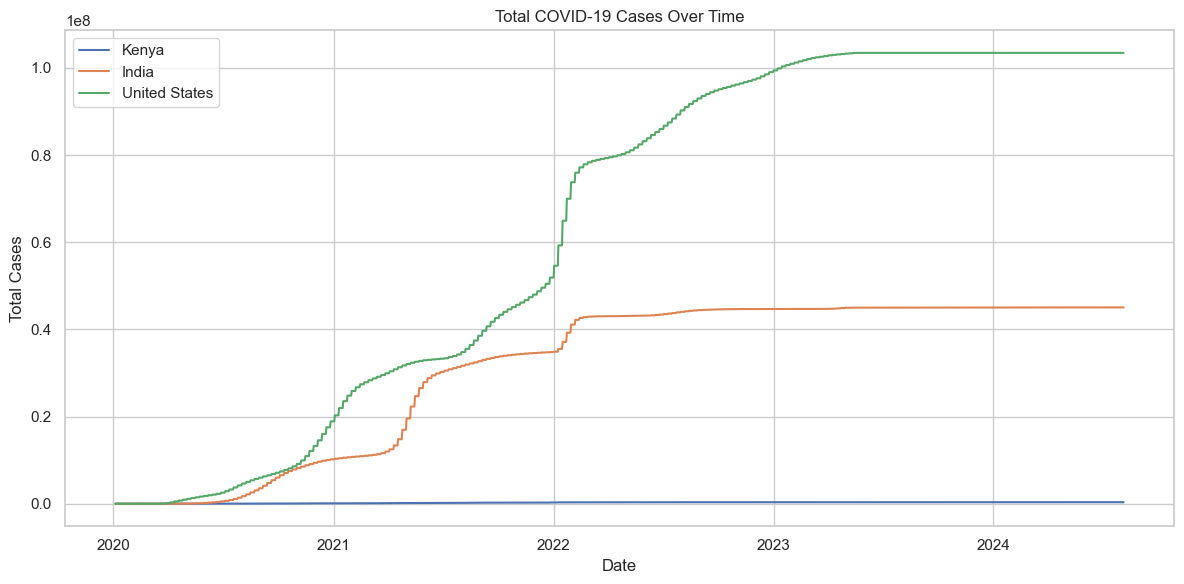

In [15]:


# Set visual style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot total cases over time for each country
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()


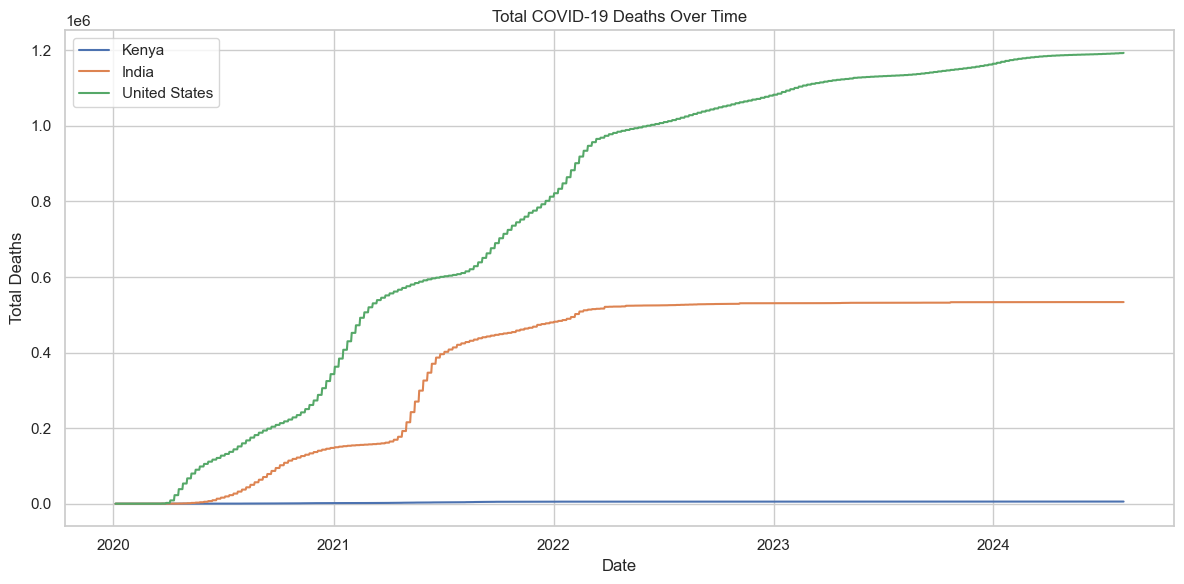

In [16]:
# Plot total deaths over time
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.tight_layout()
plt.show()


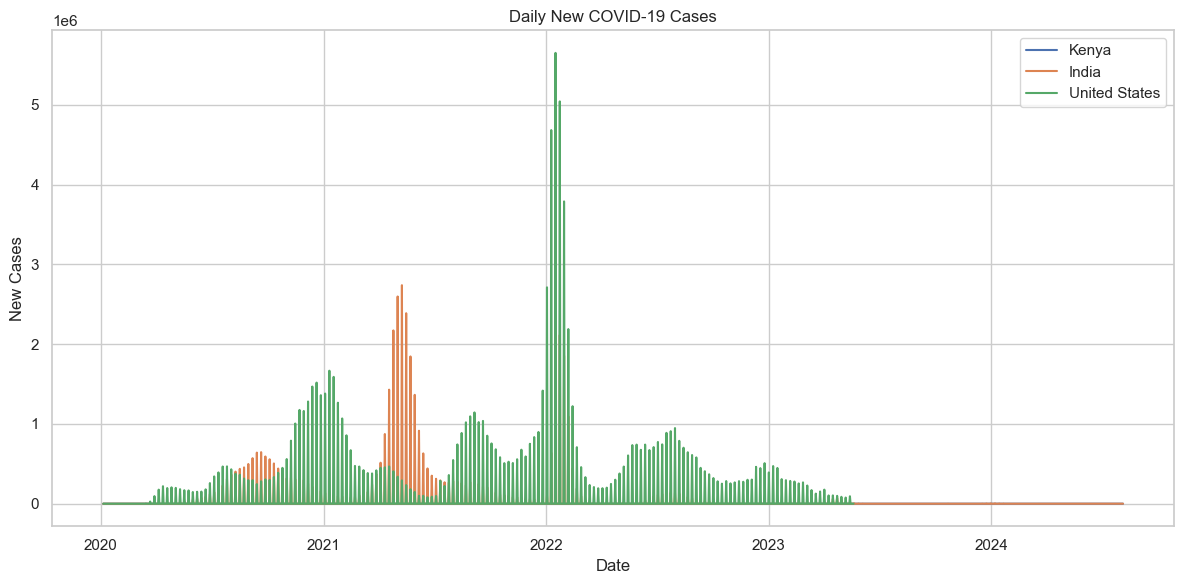

In [17]:
# Plot daily new cases for comparison
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()


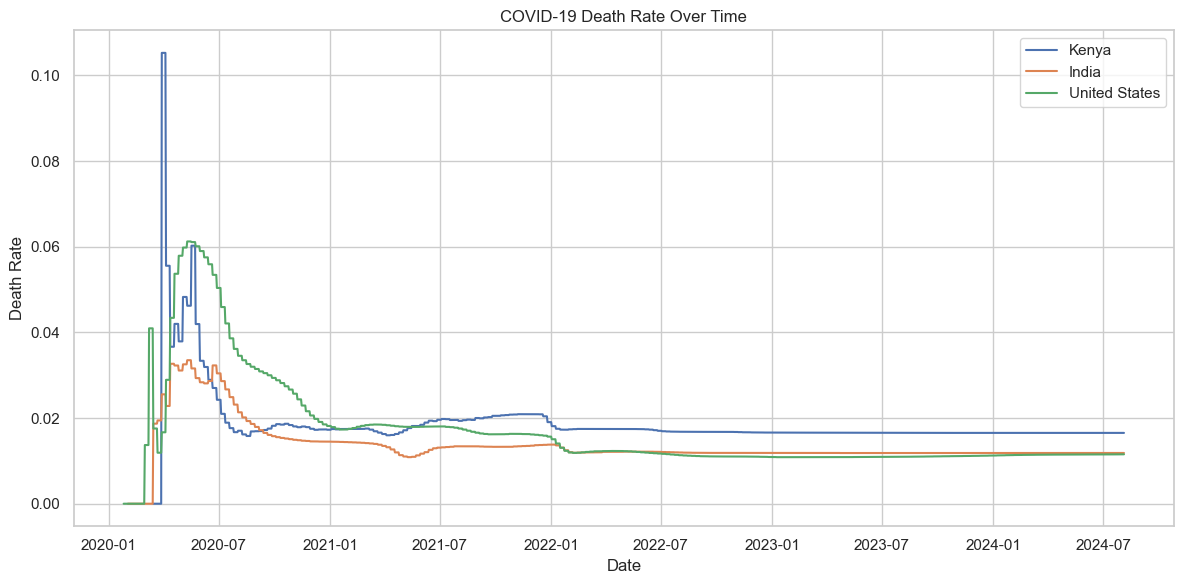

In [18]:
# Calculate death rate and plot
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']

plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.tight_layout()
plt.show()


In [23]:
## Step 5: Visualizing Vaccination Progress

#We visualized vaccination rollout by examining:

# **Total Vaccinations** administered over time.
# **% of People Fully Vaccinated** — the proportion of the population that completed full vaccination.

#This helps us understand how quickly and effectively different countries rolled out vaccines.


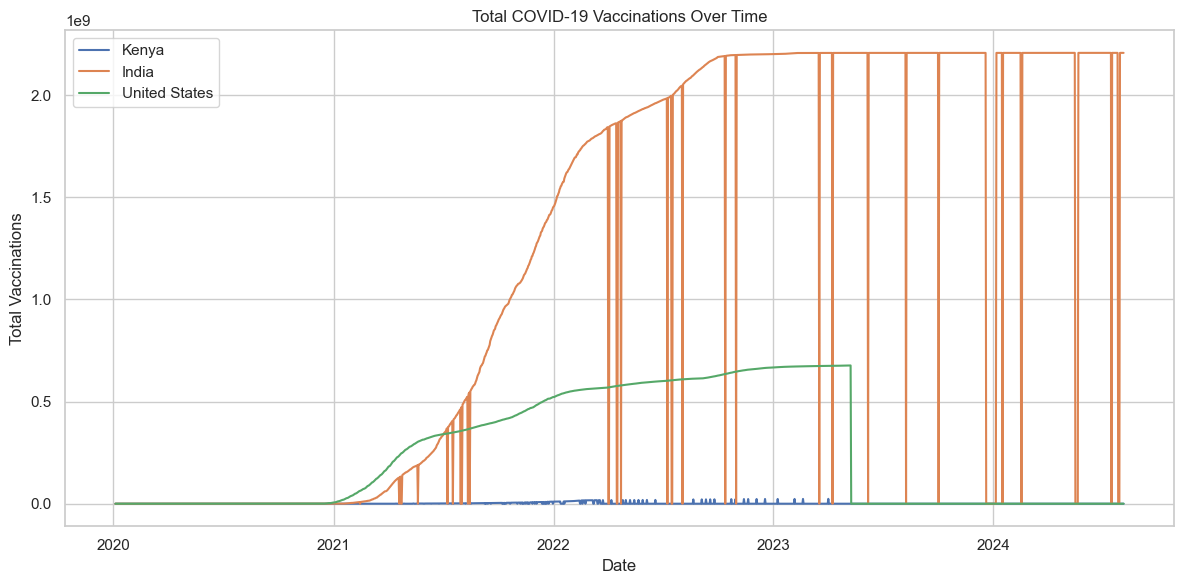

In [21]:
# Plot total vaccinations over time
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.tight_layout()
plt.show()


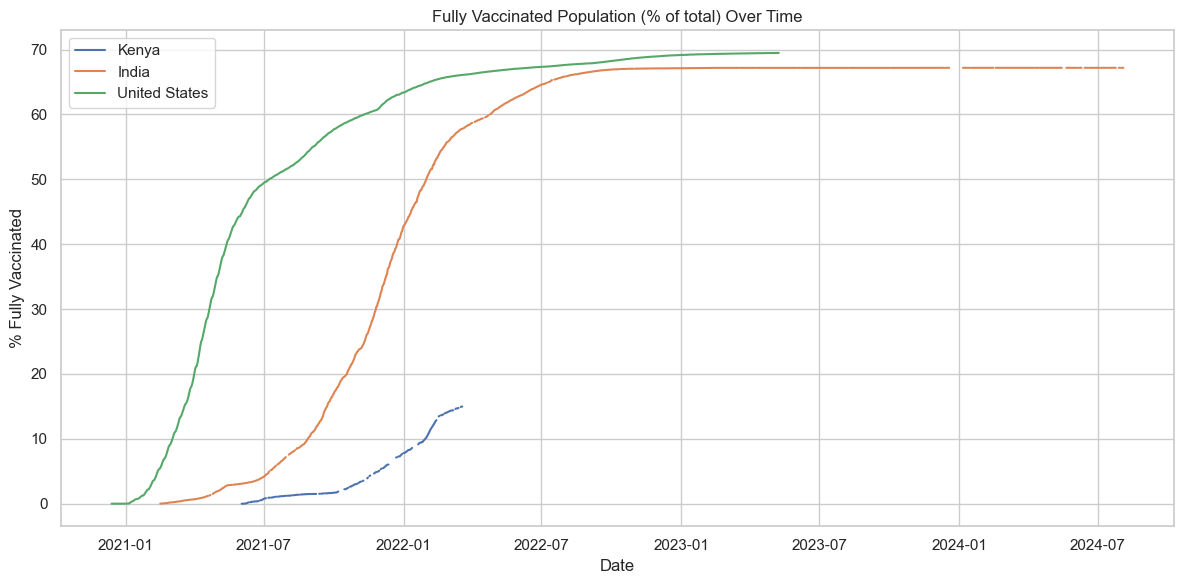

In [22]:
# Plot percentage of population vaccinated (people_fully_vaccinated_per_hundred)
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['people_fully_vaccinated_per_hundred'], label=country)

plt.title('Fully Vaccinated Population (% of total) Over Time')
plt.xlabel('Date')
plt.ylabel('% Fully Vaccinated')
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
## Step 6: Choropleth Map

#This interactive world map visualizes **total confirmed COVID-19 cases** per country using a color gradient. It provides a global overview of the pandemic's spread as of the most recent date in the dataset.

#We can also adapt this to visualize **vaccination rates** or other metrics by changing the value mapped to color.


In [2]:
# 📊 Key Insights

# India recorded a prolonged early phase with zero reported cases – The dataset shows multiple days in early January 2020 where India reported 0 cases, indicating delayed onset or detection.

# Testing data is sparse or missing for some metrics – Features like `weekly_icu_admissions` and `excess_mortality_cumulative_per_million` had high counts of missing values (~418K), signaling potential gaps in country-level reporting.

# Vaccination progress is trackable at a detailed level – Metrics include `total_vaccinations`, `people_fully_vaccinated`, and `boosters`, allowing for a granular view of rollout phases.

# Socioeconomic variables are embedded – This allows analysis of how factors like `gdp_per_capita` and `hospital_beds_per_thousand` might influence pandemic outcomes.

# 🔍 Anomalies & Interesting Patterns

# Flatlined case/death counts: Some early entries (e.g., for India) report zero cases/deaths over multiple days – likely due to underreporting or lags in testing.

# Disparity in data richness: Wealthier nations tend to have more complete data on hospital admissions and testing, which could skew comparative analysis.

# Massive population skew: Countries like India show consistent population values (e.g., ~1.4B), affecting per capita metrics significantly.


In [1]:
# Made by Muusi Nguutu Nzyoka